In [1]:
import pandas as pd
df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
df = df.dropna(subset=['CustomerID'])

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [8]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Hour,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2


In [4]:
clv = df.groupby('CustomerID')['TotalAmount'].sum().reset_index()
clv = clv.rename(columns={'TotalAmount': 'CLV'})
clv = clv.sort_values(by='CLV', ascending=False)
clv.head()


,CustomerID,CLV
1690,14646.0,280206.02
4202,18102.0,259657.30
3729,17450.0,194550.79
3009,16446.0,168472.50
1880,14911.0,143825.06


In [12]:
df['Hour'] = df['InvoiceDate'].dt.hour
hourly_sales = df.groupby('Hour')['TotalAmount'].sum().reset_index()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


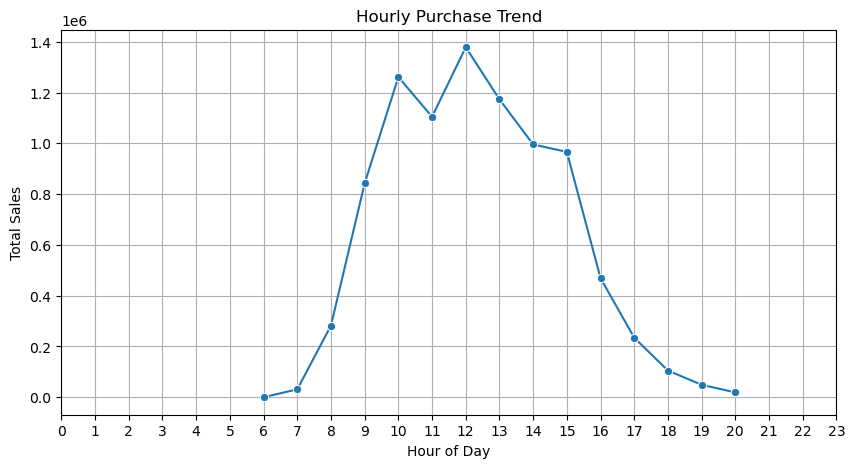

In [11]:

plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_sales, x='Hour', y='TotalAmount', marker='o')
plt.title('Hourly Purchase Trend')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


In [15]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
daily_sales = df.groupby('DayOfWeek')['TotalAmount'].sum().reset_index()

In [13]:
import calendar
daily_sales['Day'] = daily_sales['DayOfWeek'].apply(lambda x: calendar.day_name[x])


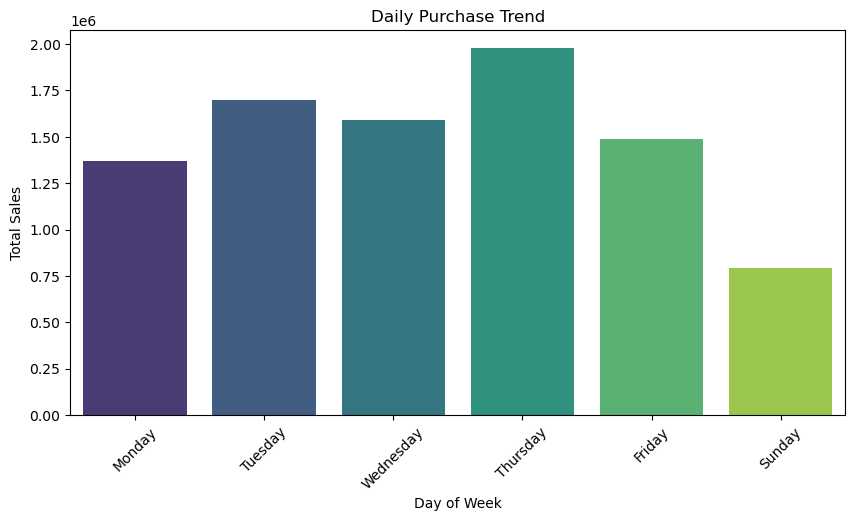

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(data=daily_sales, x='Day', y='TotalAmount', hue='Day', palette='viridis', dodge=False, legend=False)
plt.title('Daily Purchase Trend')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


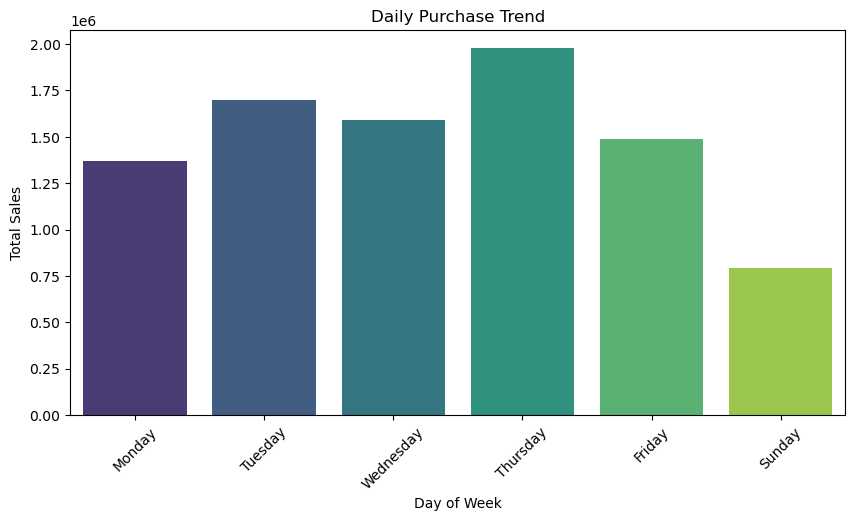

In [24]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
daily_sales = df.groupby('DayOfWeek')['TotalAmount'].sum().reset_index()
daily_sales['Day'] = daily_sales['DayOfWeek'].apply(lambda x: calendar.day_name[x])

plt.figure(figsize=(10, 5))
sns.barplot(data=daily_sales, x='Day', y='TotalAmount', hue='Day', palette='viridis', dodge=False, legend=False)
plt.title('Daily Purchase Trend')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [36]:
basket = df[df['Quantity'] > 0]
basket_matrix = (basket
                 .groupby(['InvoiceNo', 'Description'])['Quantity']
                 .sum().unstack().fillna(0))
basket_matrix = basket_matrix.applymap(lambda x: 1 if x > 0 else 0)


C:\Users\Jaya Priya\AppData\Local\Temp\ipykernel_8704\2731580703.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_matrix = basket_matrix.applymap(lambda x: 1 if x > 0 else 0)


In [35]:
frequent_itemsets = apriori(basket_matrix, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules = rules.sort_values(by='confidence', ascending=False)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()


,antecedents,consequents,support,confidence,lift
70,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.021040,0.894495,23.994742
71,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.021040,0.847826,20.070631
8,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.024817,0.827338,22.193256
62,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.023522,0.784173,18.563760
13,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.029186,0.782923,18.534184
